## Rainfall clasification using Principal Component Analysis

> Add blockquote



Installing Pycaret

In [1]:
!pip install pycaret

!pip install shap

!pip installl pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

Import Libraries

In [2]:
!pip install shap

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import shap
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


# Dataset:
This dataset could be useful for weather forecasting, rainfall pattern analysis, or understanding the relationships between various meteorological variables and weather conditions.

Contains these columns -
date
rainfall
temperature
humidity
wind_speed
weather_condition

In [5]:

from google.colab import drive
drive.mount('/content/drive')

# Load data from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rainfall.csv')

df.head(100)

Mounted at /content/drive


,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
7,2022-01-08,0.0,21.7,48.0,2.9,Sunny
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


Dataset Cleanup

In [7]:
columns_to_drop = ['date']

df = df.drop(columns=columns_to_drop)

In [8]:
df = df.drop_duplicates()

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

df = df.dropna()

print("Number of rows with NaNs is after dropping nan value: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  1
Number of rows with NaNs is after dropping nan value:  0


Exploratory Data Analysis

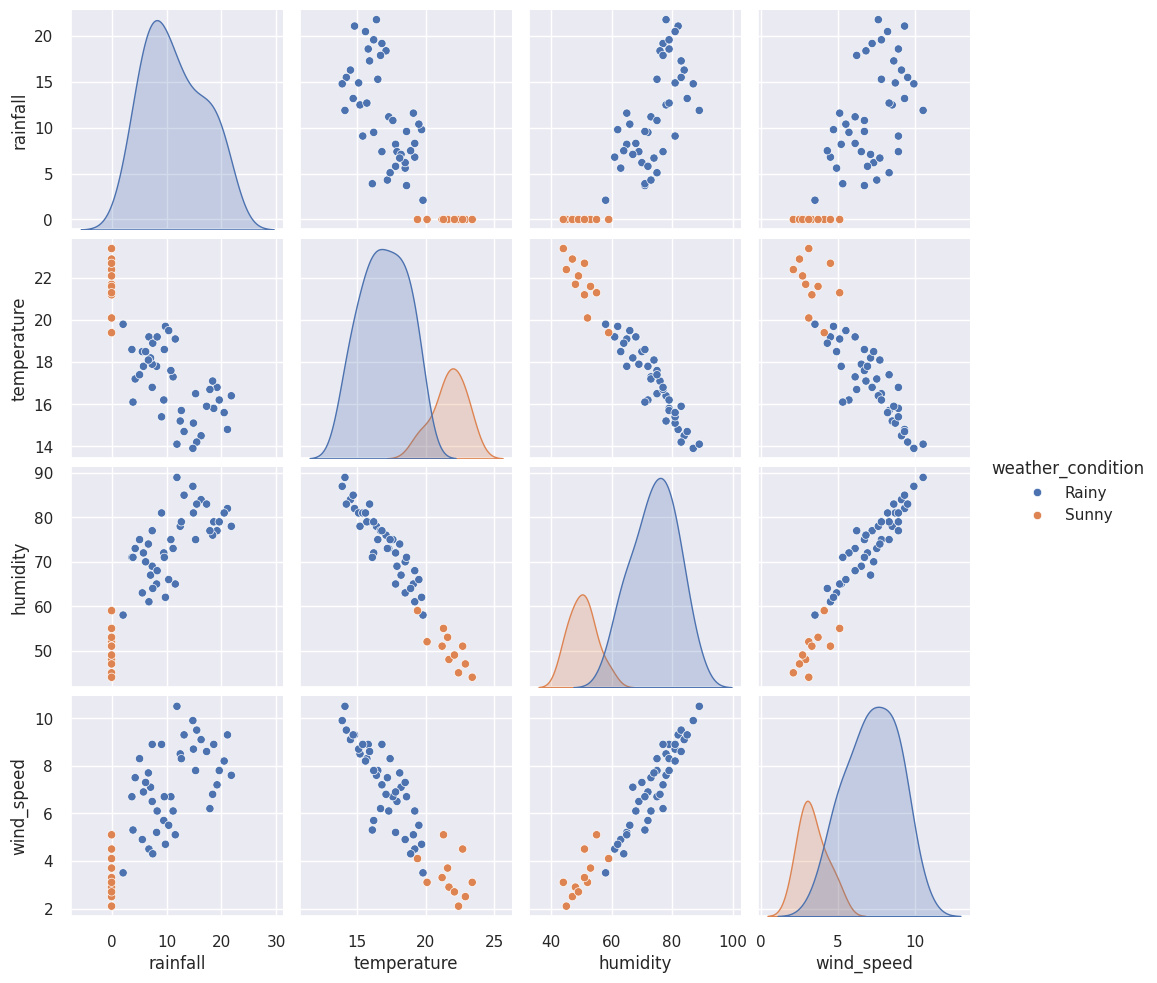

In [10]:
sns.pairplot(df, hue='weather_condition')
plt.show()

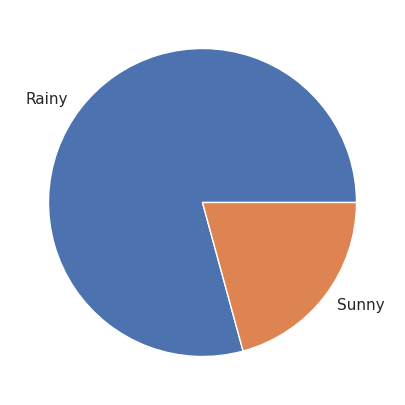

In [11]:
y =df['weather_condition']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [12]:
X = df.drop(columns=['weather_condition'])
X.head(100)

,rainfall,temperature,humidity,wind_speed
0,12.5,15.2,78.0,8.5
1,8.2,17.8,65.0,5.2
2,0.0,20.1,52.0,3.1
3,3.7,18.6,71.0,6.7
4,21.1,14.8,82.0,9.3
5,15.3,16.5,75.0,7.8
6,6.8,19.2,61.0,4.5
7,0.0,21.7,48.0,2.9
8,11.2,17.3,73.0,6.1
9,18.6,15.8,79.0,8.9


Standardize the Data

In [13]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rainfall,53.0,9.049057,6.712521,0.0,3.9,8.3,14.8,21.8
temperature,53.0,17.950943,2.500663,13.9,16.1,17.8,19.4,23.4
humidity,53.0,69.245283,11.969361,44.0,62.0,72.0,78.0,89.0
wind_speed,53.0,6.403774,2.209069,2.1,4.7,6.7,8.3,10.5


In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(100)

,rainfall,temperature,humidity,wind_speed
0,0.519025,-1.110613,0.738427,0.957999
1,-0.127699,-0.060939,-0.358073,-0.550138
2,-1.360987,0.867619,-1.454573,-1.509862
3,-0.804503,0.262038,0.148004,0.135379
4,1.812474,-1.272101,1.075811,1.323608
5,0.940148,-0.585776,0.485388,0.638091
6,-0.338260,0.504270,-0.695458,-0.870046
7,-1.360987,1.513572,-1.791958,-1.601264
8,0.323504,-0.262799,0.316696,-0.138828
9,1.436471,-0.868380,0.822773,1.140804


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rainfall,53.0,1.104986e-16,1.00957,-1.360987,-0.774423,-0.112659,0.864947,1.917754
temperature,53.0,4.336154e-16,1.00957,-1.635450,-0.747264,-0.060939,0.585014,2.199897
humidity,53.0,1.277804e-16,1.00957,-2.129343,-0.611112,0.232350,0.738427,1.666234
wind_speed,53.0,-2.597503e-16,1.00957,-1.966873,-0.778644,0.135379,0.866597,1.872022


Observations and Variables

In [16]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

[Text(0, 0, 'rainfall'),
 Text(1, 0, 'temperature'),
 Text(2, 0, 'humidity'),
 Text(3, 0, 'wind_speed')]

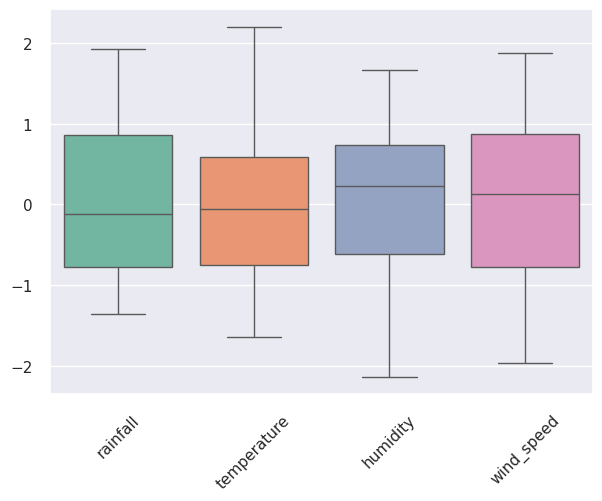

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

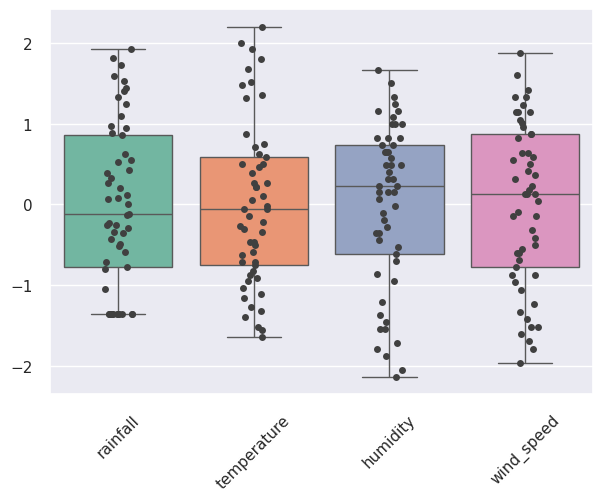

In [18]:
# Using swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

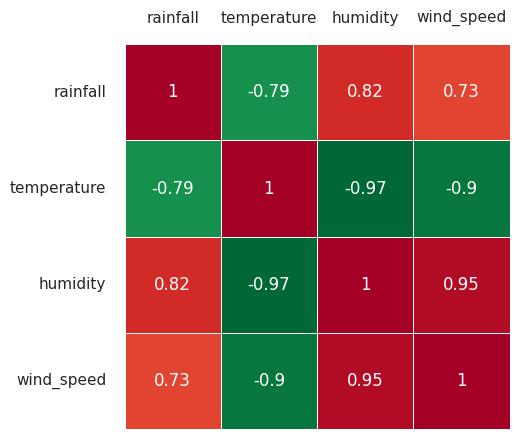

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis

Using PCA Library

In [20]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.0 MB/s eta 0:00:00


In [21]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [22]:
out['PC']

,PC1,PC2
0,-1.674026,-0.299665
1,0.490783,0.172850
2,2.590666,-0.120037
3,0.361770,-0.729749
4,-2.715623,0.577242
5,-1.308535,0.346885
6,1.213787,0.293932
7,3.142758,0.102131
8,-0.380006,0.234214
9,-2.111226,0.450724


Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.54%] of the variance'}, xlabel='PC1 (89.7% expl.var)', ylabel='PC2 (7.52% expl.var)'>)

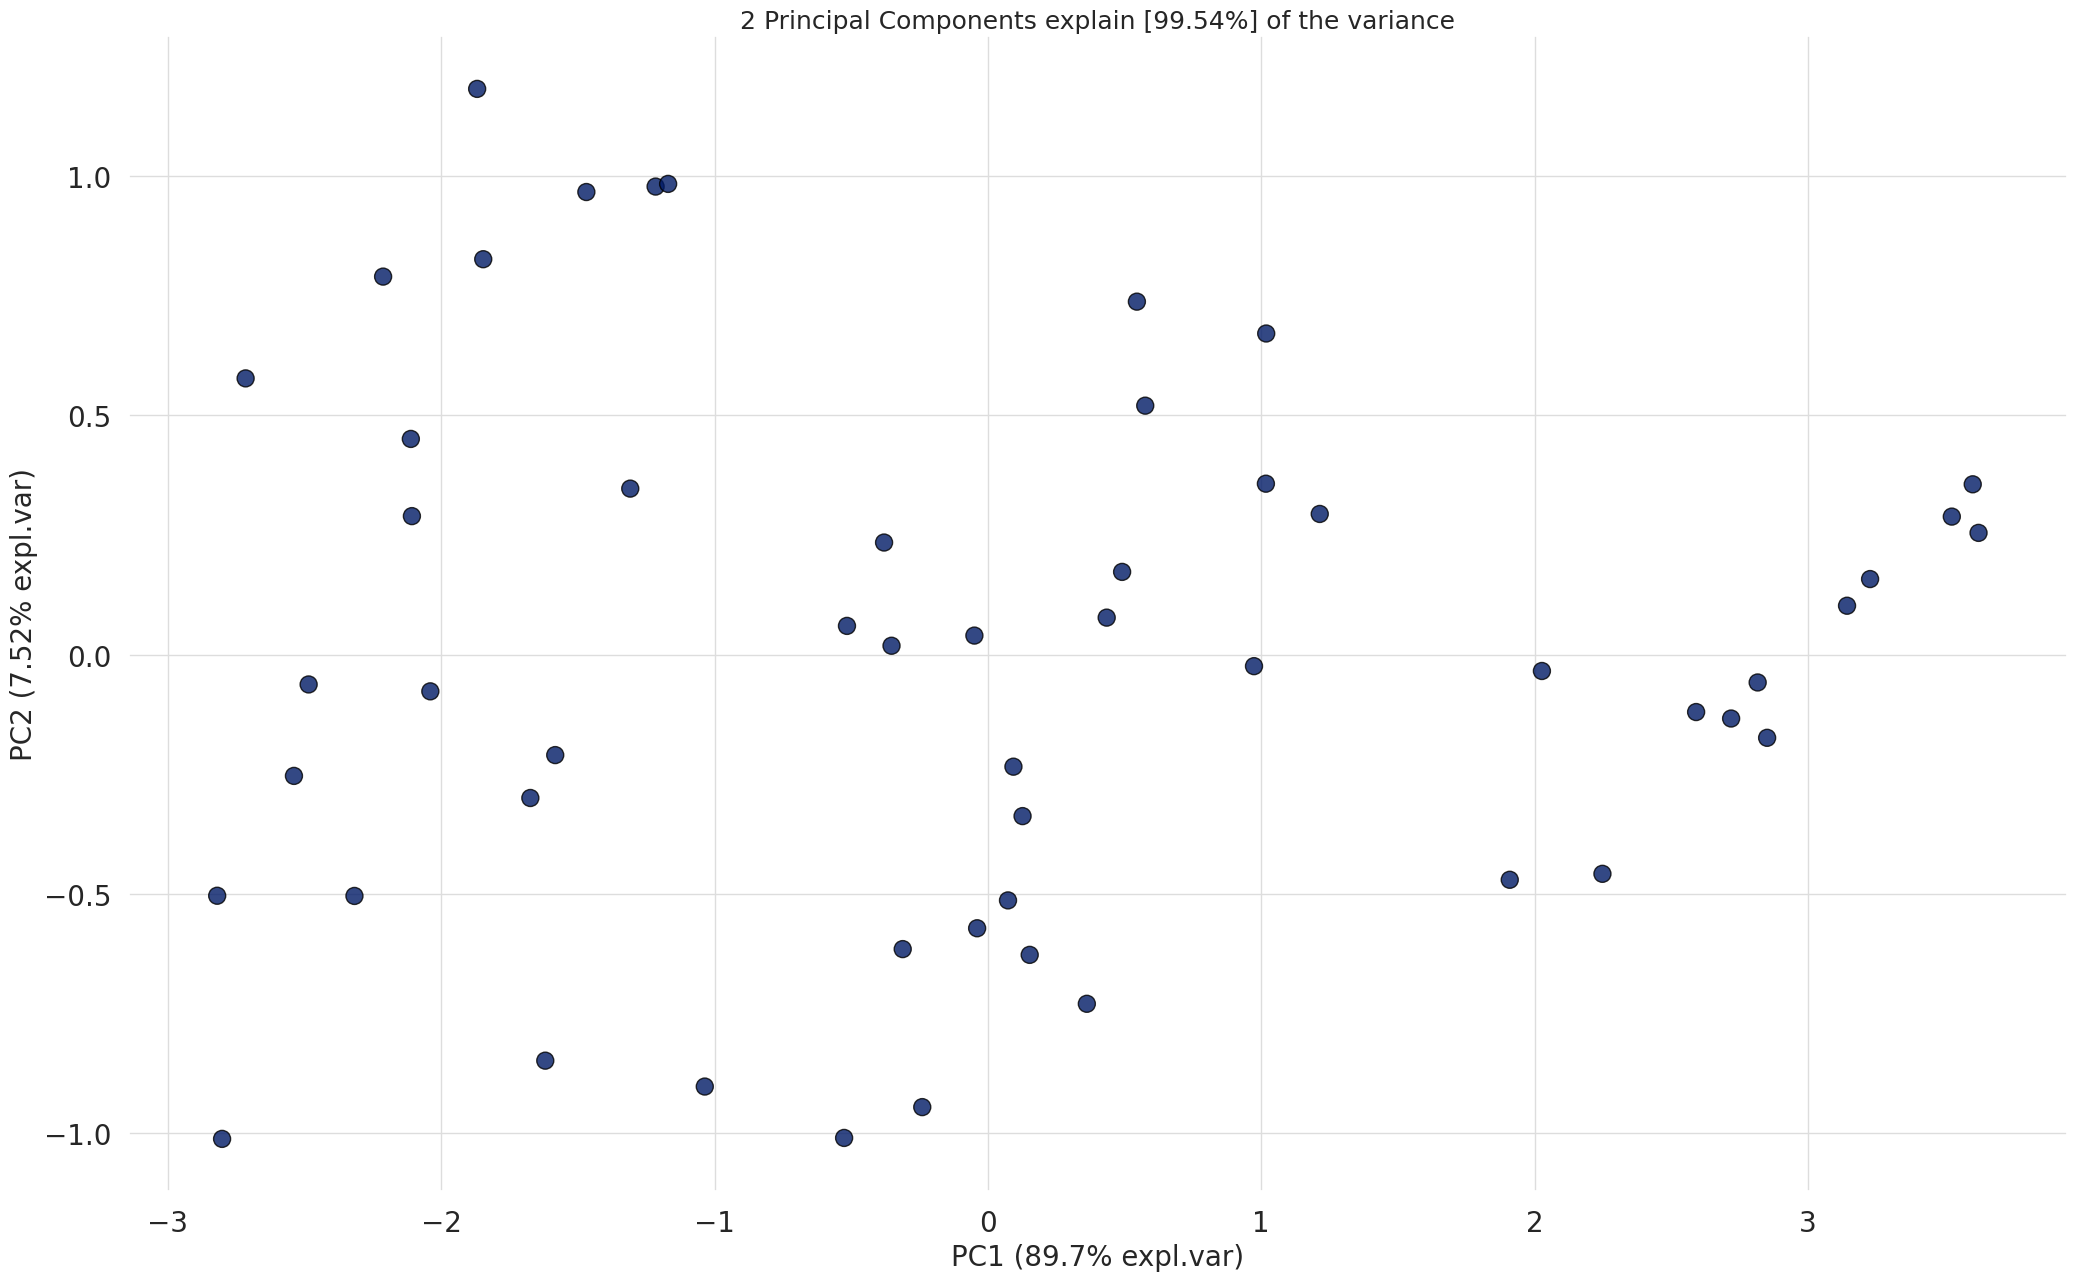

In [23]:
model.scatter(label=True, legend=False)

Eigenvectors

In [24]:
A = out['loadings'].T
A

,PC1,PC2
rainfall,-0.463602,0.867174
temperature,0.511114,0.194129
humidity,-0.521988,-0.171603
wind_speed,-0.501362,-0.425295


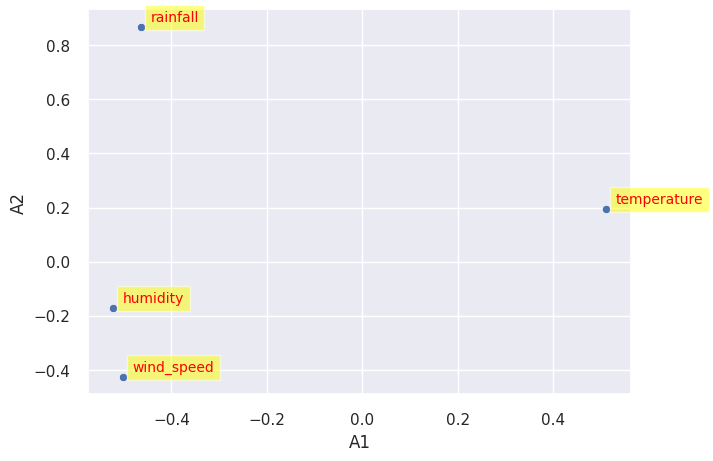

In [25]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

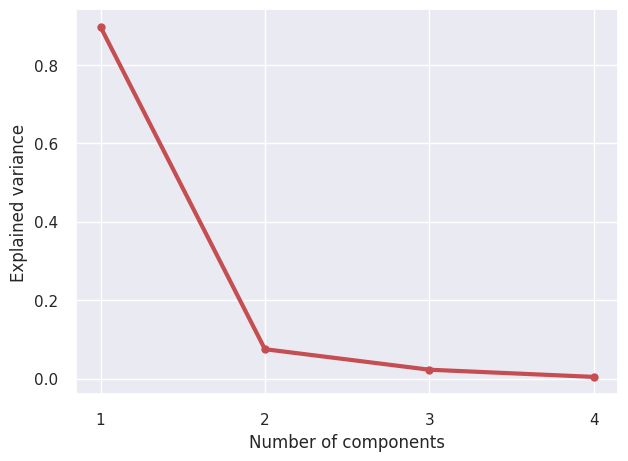

In [26]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

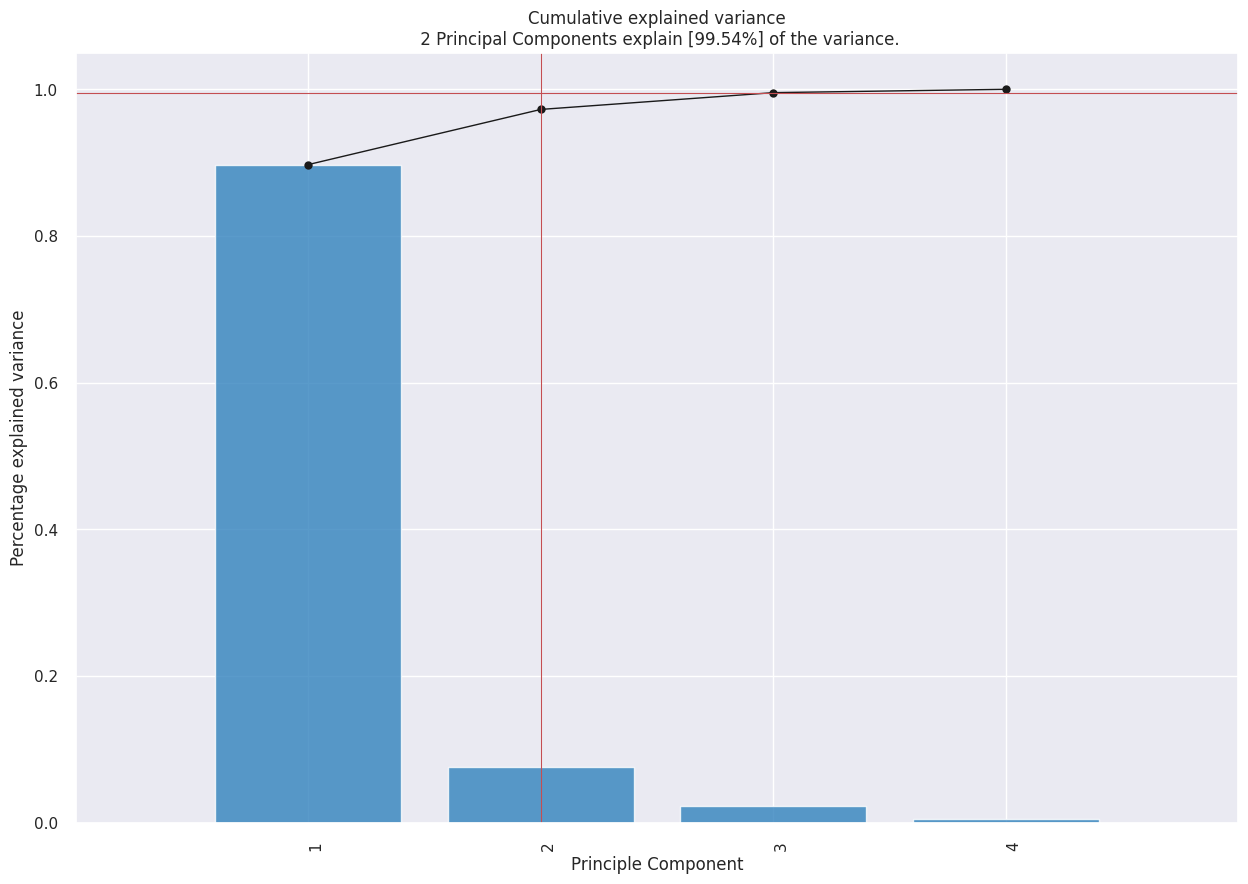

In [27]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.54%] of the variance'}, xlabel='PC1 (89.7% expl.var)', ylabel='PC2 (7.52% expl.var)'>)

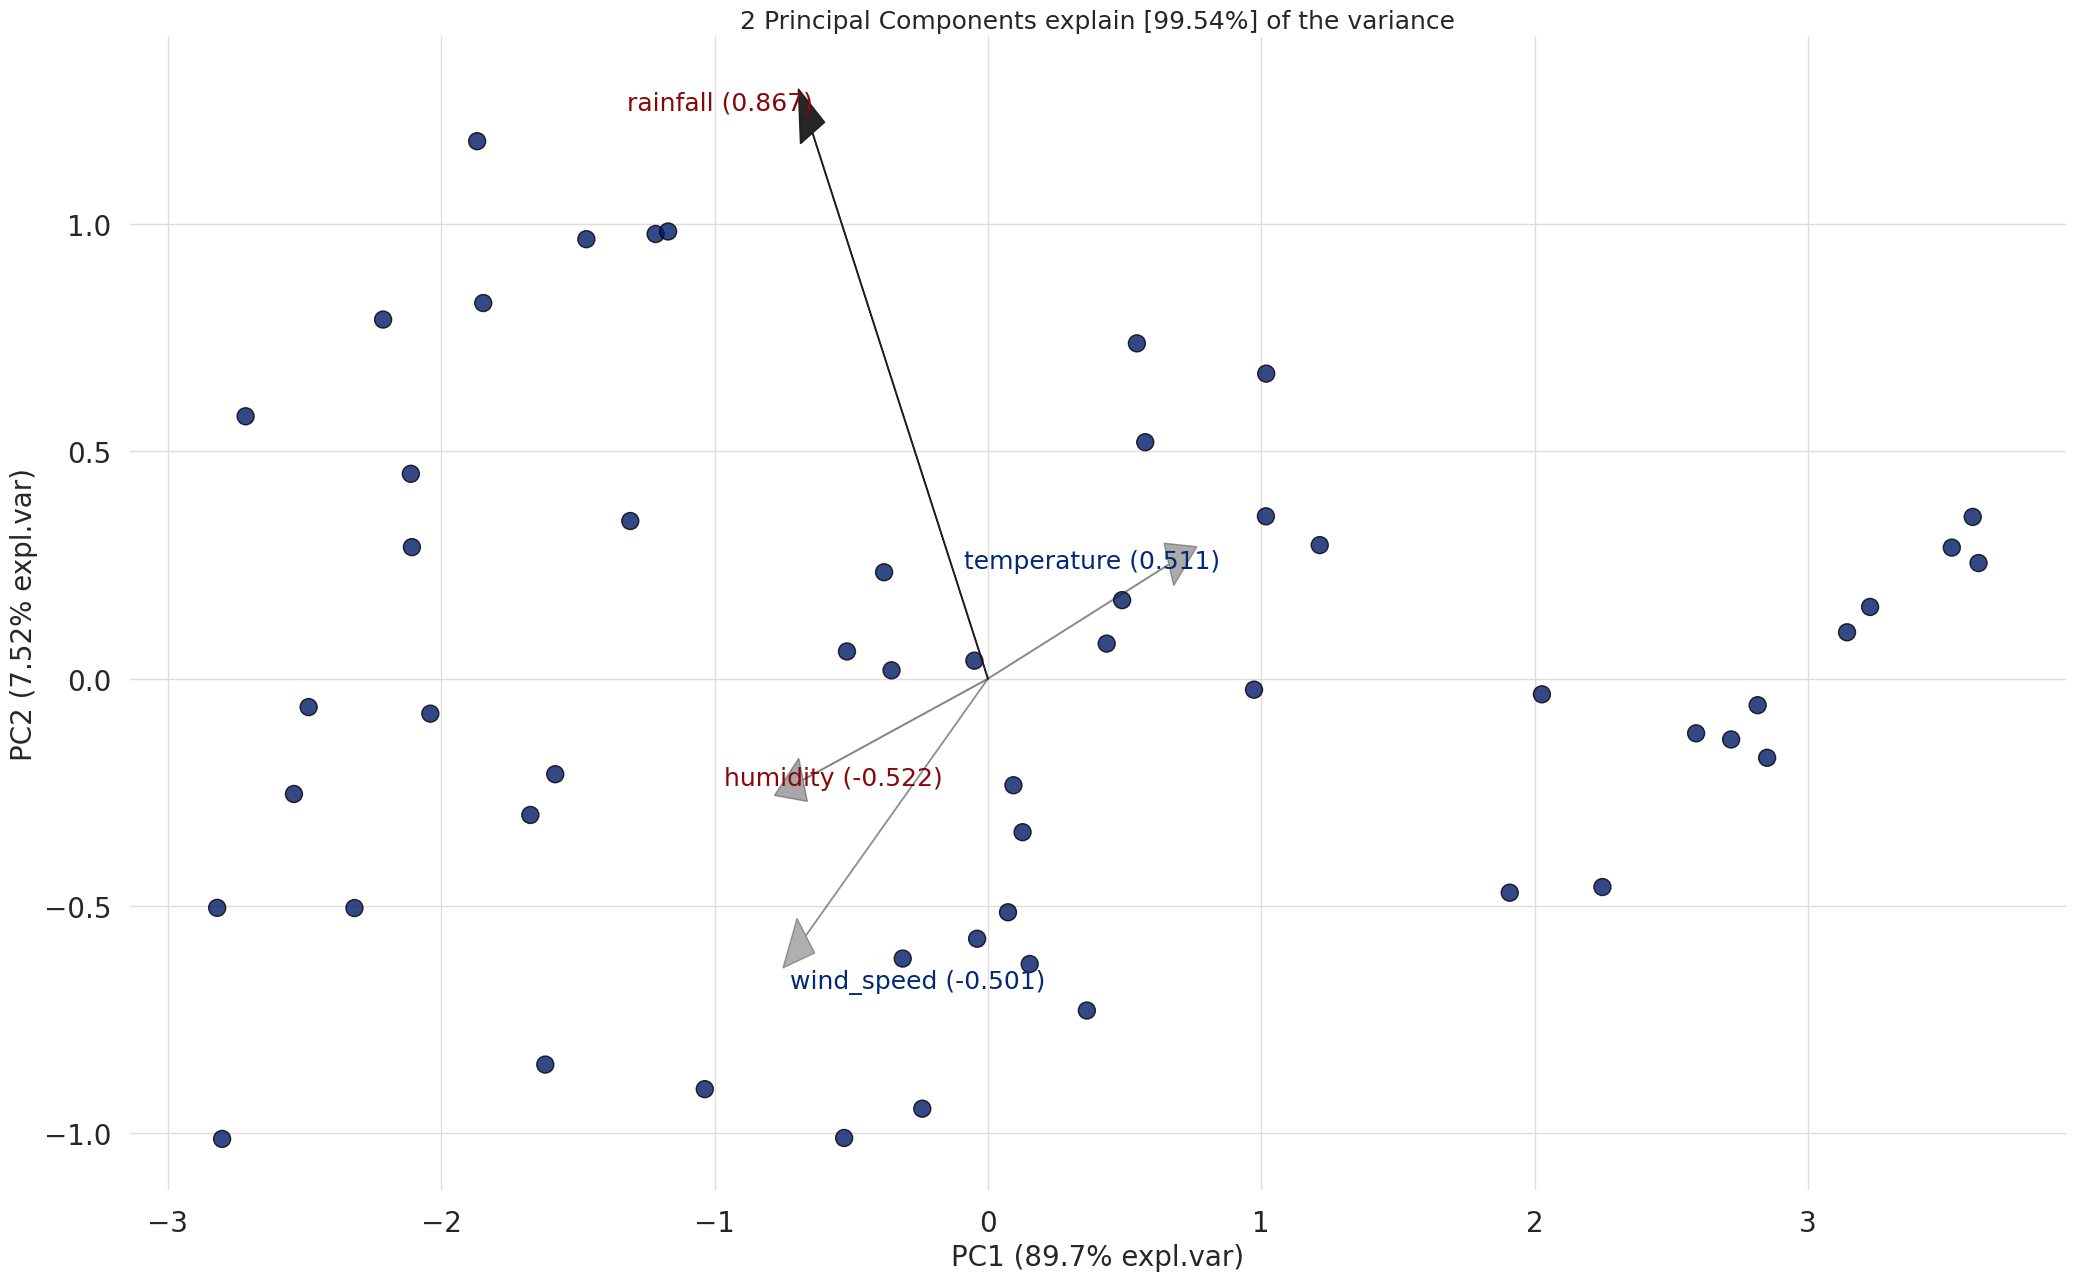

In [28]:
model.biplot(label=False, legend=False, color_arrow='k')

## Classification + PCA

In [30]:
clf_pca = setup(data=df, target='weather_condition', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

results = pull()

print(results)

,Description,Value
0,Session id,123
1,Target,weather_condition
2,Target type,Binary
3,Target mapping,"Rainy: 0, Sunny: 1"
4,Original data shape,"(53, 5)"
5,Transformed data shape,"(53, 4)"
6,Transformed train set shape,"(37, 4)"
7,Transformed test set shape,"(16, 4)"
8,Numeric features,4
9,Preprocess,True


                    Description               Value
0                    Session id                 123
1                        Target   weather_condition
2                   Target type              Binary
3                Target mapping  Rainy: 0, Sunny: 1
4           Original data shape             (53, 5)
5        Transformed data shape             (53, 4)
6   Transformed train set shape             (37, 4)
7    Transformed test set shape             (16, 4)
8              Numeric features                   4
9                    Preprocess                True
10              Imputation type              simple
11           Numeric imputation                mean
12       Categorical imputation                mode
13                    Normalize                True
14             Normalize method              zscore
15                          PCA                True
16                   PCA method              linear
17               PCA components                   3
18          

Comparing All Models

In [31]:
best_model_pca = compare_models()

results = pull()

print(results)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,1.3940
knn,K Neighbors Classifier,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.0620
dt,Decision Tree Classifier,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.0490
svm,SVM - Linear Kernel,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.0500
rf,Random Forest Classifier,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.1990
ada,Ada Boost Classifier,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.0480
gbc,Gradient Boosting Classifier,1.0000,0.8000,1.0000,1.0000,1.0000,nan,0.8000,0.1680
nb,Naive Bayes,0.9750,0.8000,0.9750,0.9562,0.9643,nan,0.7000,0.0460
ridge,Ridge Classifier,0.9750,0.8000,0.9750,0.9562,0.9643,nan,0.7000,0.0460
qda,Quadratic Discriminant Analysis,0.9750,0.8000,0.9750,0.9562,0.9643,nan,0.7000,0.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                                    Model  Accuracy  AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  0.8  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  0.8  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  0.8  1.0000  1.0000   
svm                   SVM - Linear Kernel    1.0000  0.8  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  0.8  1.0000  1.0000   
ada                  Ada Boost Classifier    1.0000  0.8  1.0000  1.0000   
gbc          Gradient Boosting Classifier    1.0000  0.8  1.0000  1.0000   
nb                            Naive Bayes    0.9750  0.8  0.9750  0.9562   
ridge                    Ridge Classifier    0.9750  0.8  0.9750  0.9562   
qda       Quadratic Discriminant Analysis    0.9750  0.8  0.9750  0.9562   
lda          Linear Discriminant Analysis    0.9750  0.8  0.9750  0.9562   
et                 Extra Trees Classifier    0.9750  0.8  0.9750  0.9562   
xgboost     

Best model with PCA

In [32]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
tuned_best_model_pca = tune_model(best_model_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Evaluate Best Model

In [34]:
evaluate_model(tuned_best_model_pca)

results = pull()

print(results)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


# Random Forest Classifier Model

In [35]:
rf_pca = create_model('rf')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Tuning Random Forest Classifier Model

In [36]:
tuned_rf_pca = tune_model(rf_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Evaluating tuned random forest classifier model

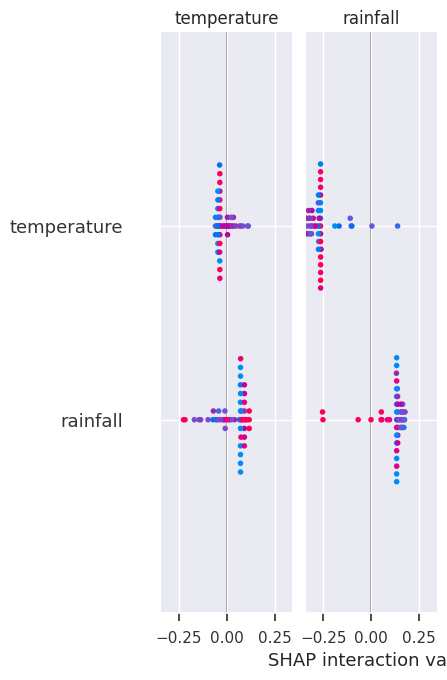

In [37]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Extra Trees Classifier Model

In [38]:
et_pca = create_model('et')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7500,1.0000,0.7500,0.5625,0.6429,0.0000,0.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy  AUC  Recall   Prec.      F1  Kappa     MCC
Fold                                                      
0        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
1        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
2        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
3        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
4        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
5        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
6        0.750  1.0   0.750  0.5625  0.6429    0.0  0.0000
7        1.000  0.0   1.000  1.0000  1.0000    NaN  0.0000
8        1.000  0.0   1.000  1.0000  1.0000    NaN  0.0000
9        1.000  1.0   1.000  1.0000  1.0000    1.0  1.0000
Mean     0.975  0.8   0.975  0.9562  0.9643    NaN  0.7000
Std      0.075  0.4   0.075  0.1312  0.1071    NaN  0.4583


Tuning Extra Trees Classifier Model

In [39]:
tuned_et_pca = tune_model(et_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Evaluating tuned extra trees classifier model

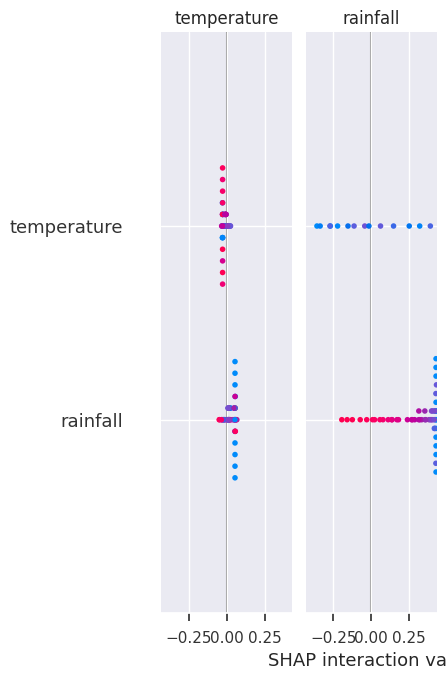

In [40]:
explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Logistic Regression Model

In [41]:
lr_pca = create_model('lr')

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Tuning Logistic Regression Model

In [42]:
tuned_lr_pca = tune_model(lr_pca)

results = pull()

print(results)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  0.0     1.0    1.0  1.0    NaN  0.0
8          1.0  0.0     1.0    1.0  1.0    NaN  0.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  0.8     1.0    1.0  1.0    NaN  0.8
Std        0.0  0.4     0.0    0.0  0.0    NaN  0.4


Evaluating tuned logistic regression model

In [43]:
import shap

In [58]:
selected_data = X.iloc[:, :3]
background_data = selected_data.sample(10, random_state=0)

  0%|          | 0/10 [00:00<?, ?it/s]

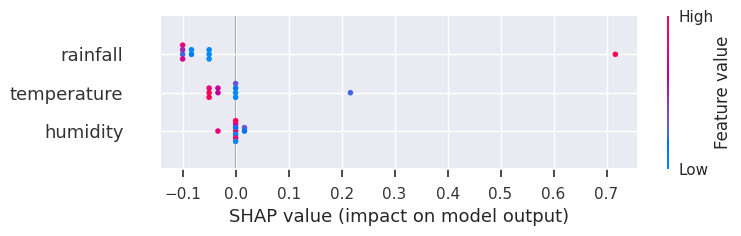

In [62]:
explainer = shap.KernelExplainer(tuned_lr_pca.predict, background_data)

shap_values = explainer.shap_values(background_data)

shap.summary_plot(shap_values, background_data)